In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns

In [2]:
df = pd.read_csv('raw_data.csv')

In [3]:
df = df.drop(columns=['COMMENT'])

In [4]:
df = df.dropna(subset=['MIN'], ignore_index=True)

In [5]:
mins = df['MIN']

floats = []

for i in range(len(mins)):
    min_ = float(mins.iloc[i].split('.')[0])
    sec = float(mins.iloc[i].split(':')[1])

    floats.append(round(min_ + (sec / 60.),2))

df['MIN'] = floats

In [6]:
df2 = df
df = df.dropna(subset=['START_POSITION'], ignore_index=True)

In [7]:
df2 = df2[df2['START_POSITION'].isnull()]
df2 = df2.reset_index()

In [8]:
df.columns

Index(['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_ID',
       'PLAYER_NAME', 'NICKNAME', 'START_POSITION', 'MIN', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS', 'PLUS_MINUS',
       'E_OFF_RATING', 'OFF_RATING', 'E_DEF_RATING', 'DEF_RATING',
       'E_NET_RATING', 'NET_RATING', 'AST_PCT', 'AST_TOV', 'AST_RATIO',
       'OREB_PCT', 'DREB_PCT', 'REB_PCT', 'TM_TOV_PCT', 'EFG_PCT', 'TS_PCT',
       'USG_PCT', 'E_USG_PCT', 'E_PACE', 'PACE', 'PACE_PER40', 'POSS', 'PIE'],
      dtype='object')

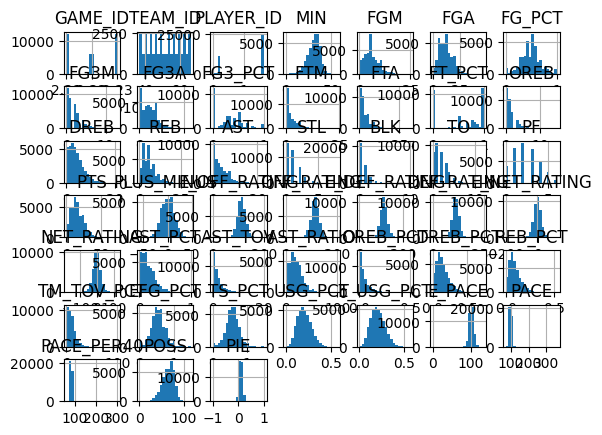

In [9]:
a = df.hist(bins=20)

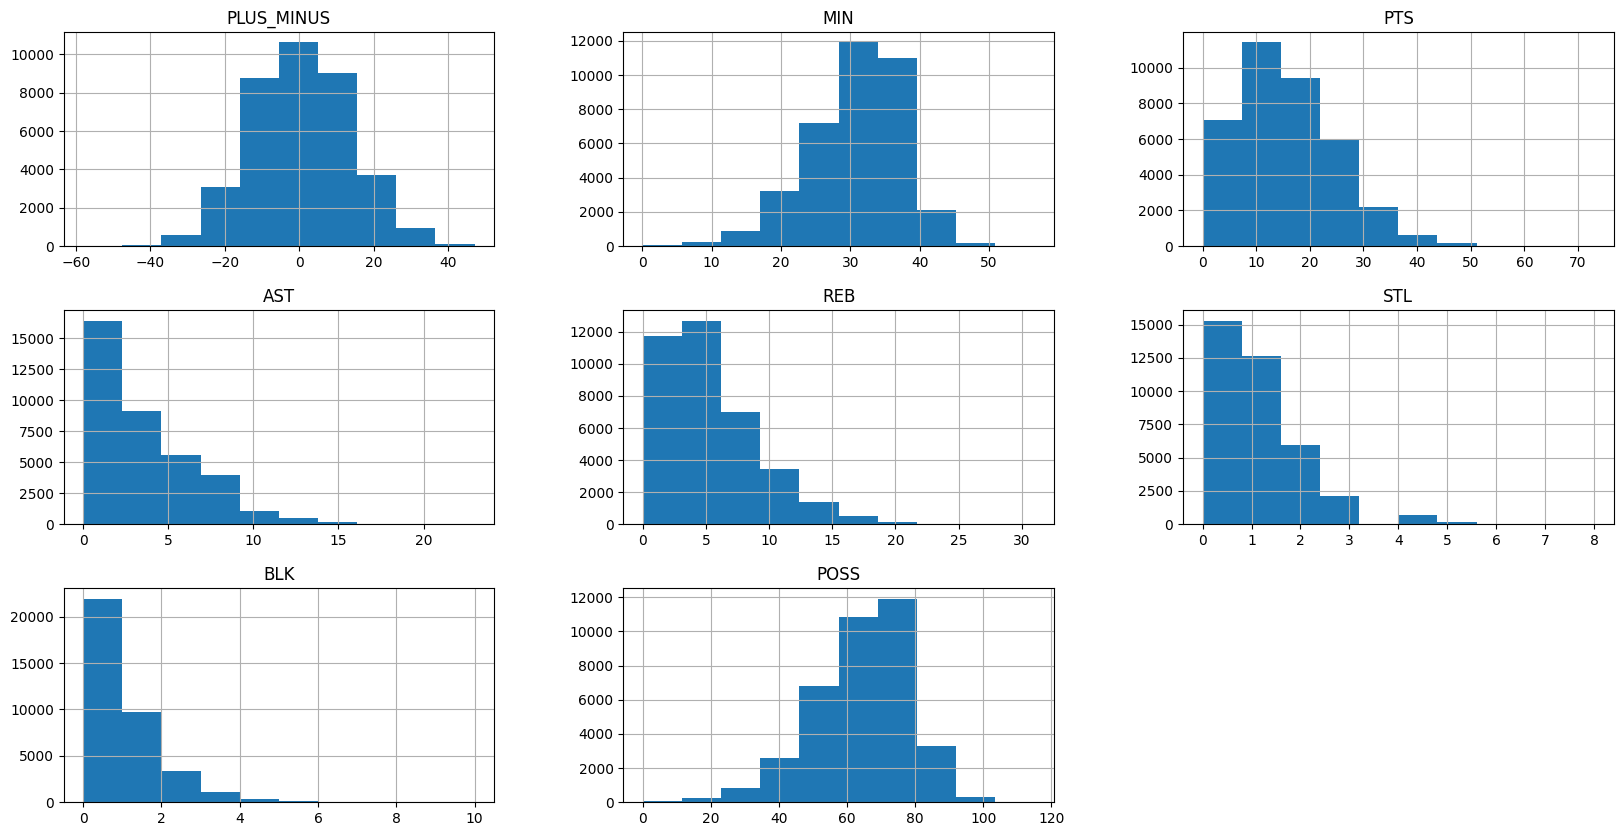

In [33]:
hist = df.hist(column=['PLUS_MINUS', 'MIN', 'PTS', 'AST', 'REB', 'STL', 'BLK', 'POSS'], bins=10, figsize=(20, 10))

plt.savefig('nba_histograms.png', bbox_inches='tight')

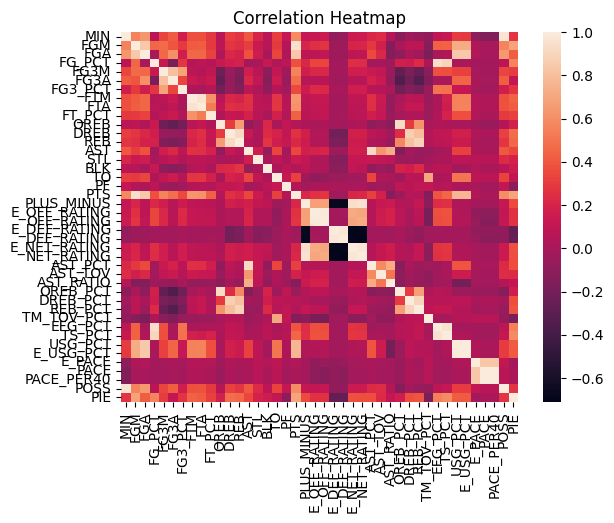

In [36]:
corr = df.drop(columns=['GAME_ID', 'PLAYER_ID', 'TEAM_ID']).select_dtypes('number').corr()
plt.title('Correlation Heatmap')
h1 = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

plt.savefig('nba_correlation.png', bbox_inches='tight')

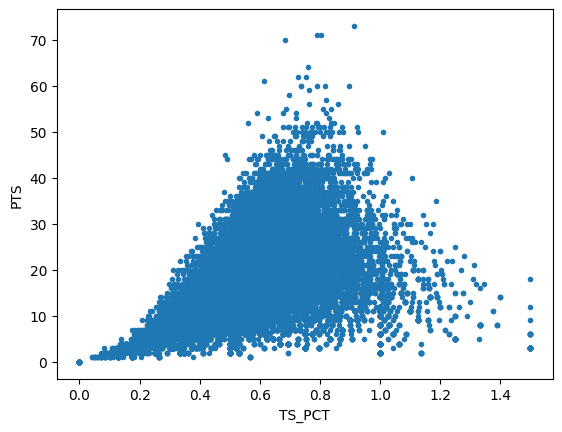

In [37]:
plt.xlabel('TS_PCT')
plt.ylabel('PTS')
s2 = plt.scatter(df['TS_PCT'], df['PTS'], marker='.')

plt.savefig('nbascatter1.png', bbox_inches='tight')

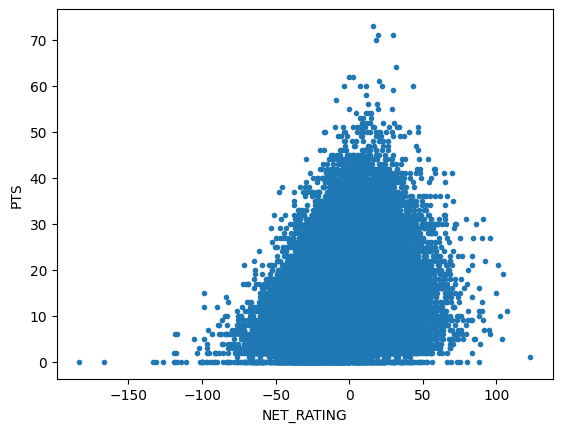

In [38]:
plt.xlabel('NET_RATING')
plt.ylabel('PTS')
s3 = plt.scatter(df['NET_RATING'], df['PTS'], marker='.')

plt.savefig('nbascatter2.png', bbox_inches='tight')

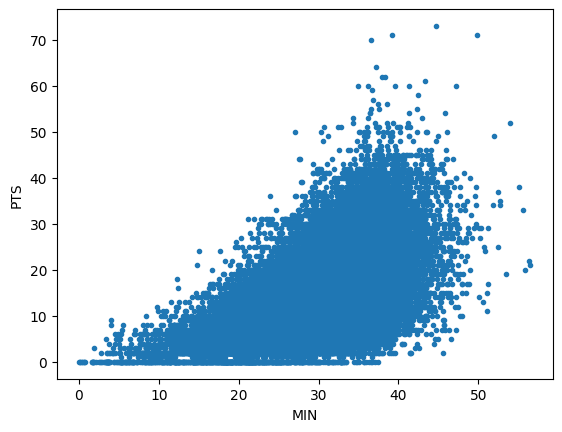

In [39]:
plt.xlabel('MIN')
plt.ylabel('PTS')
s4 = plt.scatter(df['MIN'], df['PTS'], marker='.')

plt.savefig('nbascatter3.png', bbox_inches='tight')

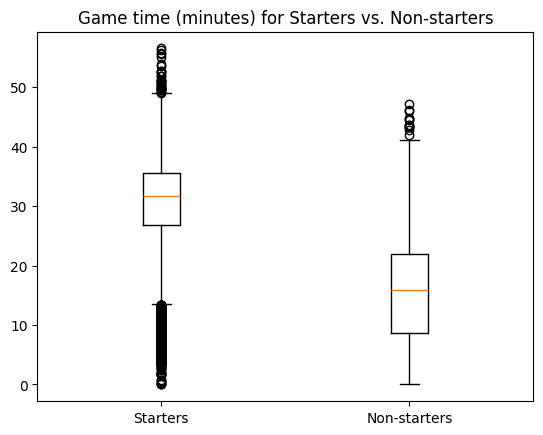

In [40]:
plt.title('Game time (minutes) for Starters vs. Non-starters')
box = plt.boxplot([df['MIN'], df2['MIN']],labels=['Starters','Non-starters'])

plt.savefig('nbabox1.png', bbox_inches='tight')

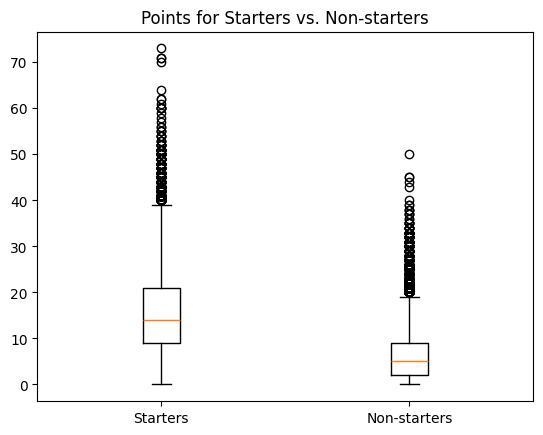

In [41]:
plt.title('Points for Starters vs. Non-starters')
box2 = plt.boxplot([df['PTS'], df2['PTS']],labels=['Starters','Non-starters'])

plt.savefig('nbabox2.png', bbox_inches='tight')

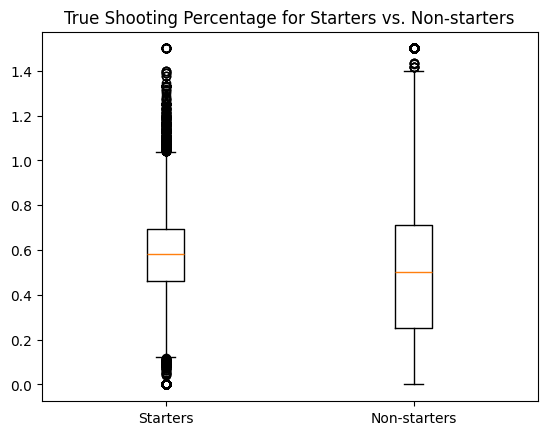

In [42]:
plt.title('True Shooting Percentage for Starters vs. Non-starters')
box2 = plt.boxplot([df['TS_PCT'], df2['TS_PCT']],labels=['Starters','Non-starters'])

plt.savefig('nbabox3.png', bbox_inches='tight')

In [18]:
df.columns

Index(['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_ID',
       'PLAYER_NAME', 'NICKNAME', 'START_POSITION', 'MIN', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS', 'PLUS_MINUS',
       'E_OFF_RATING', 'OFF_RATING', 'E_DEF_RATING', 'DEF_RATING',
       'E_NET_RATING', 'NET_RATING', 'AST_PCT', 'AST_TOV', 'AST_RATIO',
       'OREB_PCT', 'DREB_PCT', 'REB_PCT', 'TM_TOV_PCT', 'EFG_PCT', 'TS_PCT',
       'USG_PCT', 'E_USG_PCT', 'E_PACE', 'PACE', 'PACE_PER40', 'POSS', 'PIE'],
      dtype='object')

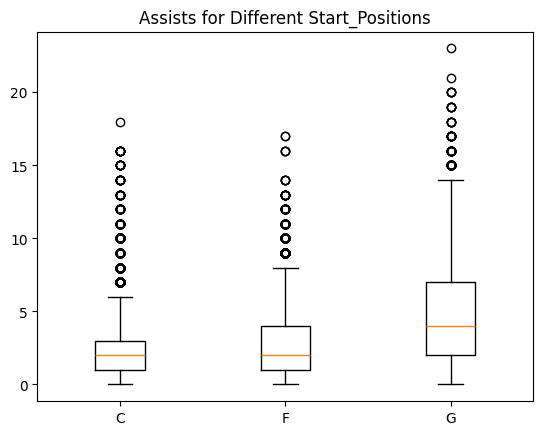

In [43]:
comp = 'AST'
plt.title('Assists for Different Start_Positions')
box3 = plt.boxplot([df[df['START_POSITION'] == 'C'][comp], df[df['START_POSITION'] == 'F'][comp], df[df['START_POSITION'] == 'G'][comp]],labels=['C','F','G'])

plt.savefig('nbabox4.png', bbox_inches='tight')

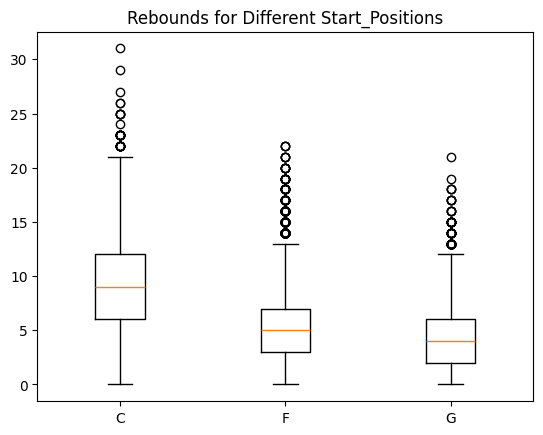

In [44]:
comp = 'REB'
plt.title('Rebounds for Different Start_Positions')
box4 = plt.boxplot([df[df['START_POSITION'] == 'C'][comp], df[df['START_POSITION'] == 'F'][comp], df[df['START_POSITION'] == 'G'][comp]],labels=['C','F','G'])

plt.savefig('nbabox5.png', bbox_inches='tight')